In [1]:
import pandas as pd
import numpy as np
import os

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [2]:
os.getcwd()

'C:\\Users\\windows\\Desktop\\Kings project\\Biometric'

In [3]:
bioData = pd.read_csv("dataset.csv")

In [4]:
len(bioData)

206228

In [5]:
# bioData.T

In [6]:
bioData.head()

,Date,Time,Resistor,RC,RR,VT,V,DTCY,ACT,SUB
0,9/1/2018,16:48:08:291,35.98228,0,20,0.879047,17.58095,66,Reading,Andrew
1,9/1/2018,16:48:08:352,36.07199,0,20,0.879047,17.58095,66,Reading,Andrew
2,9/1/2018,16:48:08:396,36.11691,0,20,0.879047,17.58095,66,Reading,Andrew
3,9/1/2018,16:48:08:441,36.16188,0,20,0.879047,17.58095,66,Reading,Andrew
4,9/1/2018,16:48:08:502,36.25196,0,20,0.879047,17.58095,66,Reading,Andrew


In [7]:
bioData.columns

Index(['Date', 'Time', 'Resistor', 'RC', 'RR', 'VT', 'V', 'DTCY', 'ACT',
       'SUB'],
      dtype='object')

In [8]:
#Explortion of the dataset
bioData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206228 entries, 0 to 206227
Data columns (total 10 columns):
Date        206228 non-null object
Time        206228 non-null object
Resistor    206228 non-null float64
RC          206228 non-null int64
RR          206228 non-null int64
VT          206228 non-null float64
V           206228 non-null float64
DTCY        206228 non-null int64
ACT         206228 non-null object
SUB         206228 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 15.7+ MB


In [9]:
bioData.describe()

,Resistor,RC,RR,VT,V,DTCY
count,206228.000000,206228.000000,206228.000000,206228.000000,206228.000000,206228.000000
mean,28.799384,9.122670,18.864310,0.805869,13.732814,33.693722
std,4.824768,5.637582,8.291949,1.352073,11.570097,33.626992
min,3.132085,0.000000,-1.000000,-0.970379,-14.555680,-433.000000
25%,24.257430,4.000000,15.000000,0.403278,6.712543,28.000000
50%,28.347580,9.000000,17.000000,0.651335,11.328660,37.000000
75%,32.831330,13.000000,24.000000,0.995239,18.264660,50.000000
max,39.334050,26.000000,40.000000,35.928760,349.196800,92.000000


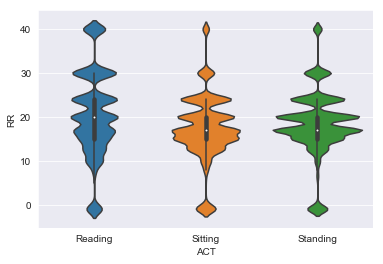

In [10]:
# ViolinPlots
vio = sns.violinplot(data=bioData, x='ACT', y='RR')

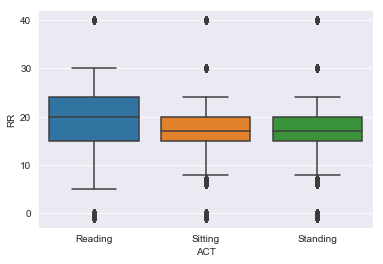

In [11]:
# BoxPlots
vio = sns.boxplot(data=bioData, x='ACT', y='RR')

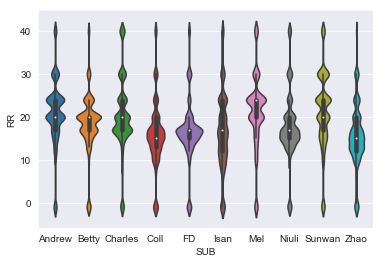

In [12]:
# ViolinPlots
vio = sns.violinplot(data=bioData, x='SUB', y='RR')

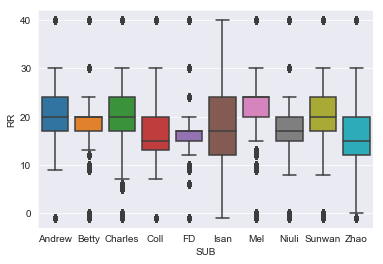

In [13]:
# BoxPlots
vio = sns.boxplot(data=bioData, x='SUB', y='RR')

In [14]:
# Changing uniq values into a catigorical values
bioData.ACT = bioData.ACT.astype('category')
bioData.SUB = bioData.SUB.astype('category')     

In [15]:
bioData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206228 entries, 0 to 206227
Data columns (total 10 columns):
Date        206228 non-null object
Time        206228 non-null object
Resistor    206228 non-null float64
RC          206228 non-null int64
RR          206228 non-null int64
VT          206228 non-null float64
V           206228 non-null float64
DTCY        206228 non-null int64
ACT         206228 non-null category
SUB         206228 non-null category
dtypes: category(2), float64(3), int64(3), object(2)
memory usage: 13.0+ MB


In [16]:
# Accessing the uniq values in the catigorical cloumn
bioData.ACT.cat.categories

Index(['Reading', 'Sitting', 'Standing'], dtype='object')

In [17]:
bioData.SUB.cat.categories

Index(['Andrew', 'Betty', 'Charles', 'Coll', 'FD', 'Isan', 'Mel', 'Niuli',
       'Sunwan', 'Zhao'],
      dtype='object')

In [18]:
print(bioData.ACT.unique())
print("----------------------------------------")
print(bioData.ACT.value_counts())

[Reading, Sitting, Standing]
Categories (3, object): [Reading, Sitting, Standing]
----------------------------------------
Standing    80333
Reading     75537
Sitting     50358
Name: ACT, dtype: int64


In [19]:
print(bioData.SUB.unique())
print("----------------------------------------")
print(bioData.SUB.value_counts())

[Andrew, Betty, Charles, Coll, FD, Isan, Mel, Niuli, Sunwan, Zhao]
Categories (10, object): [Andrew, Betty, Charles, Coll, ..., Mel, Niuli, Sunwan, Zhao]
----------------------------------------
Charles    37169
Sunwan     31174
Niuli      28776
Coll       20383
Mel        16786
Isan       15587
FD         15587
Betty      14388
Andrew     14388
Zhao       11990
Name: SUB, dtype: int64


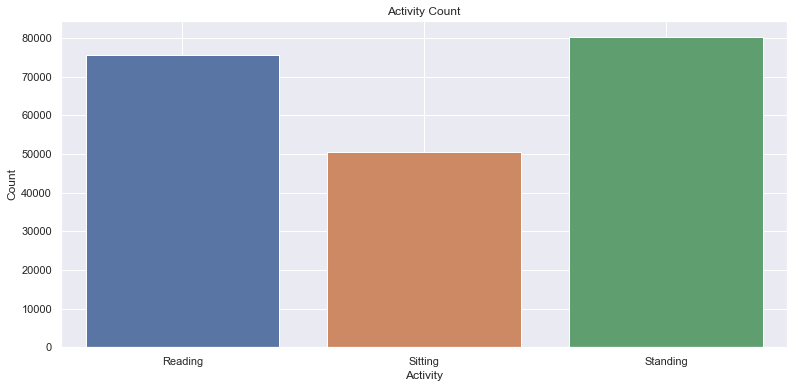

In [20]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "ACT" , data = bioData)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

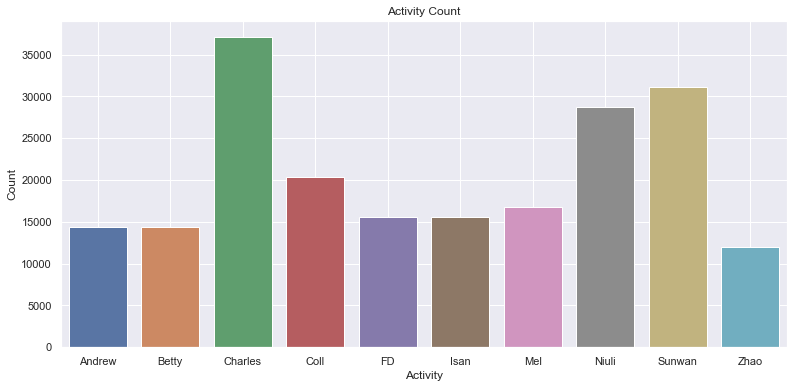

In [21]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "SUB" , data = bioData)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

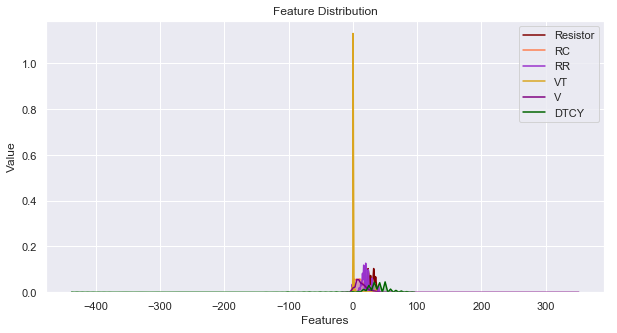

In [23]:
sns.set(rc={'figure.figsize':(10,5)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen"]
index = -1
for i in bioData.columns[2:8]:
    index = index + 1
    fig = sns.kdeplot(bioData[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

In [24]:
bioData.drop(["VT"] , axis = 1 , inplace = True)

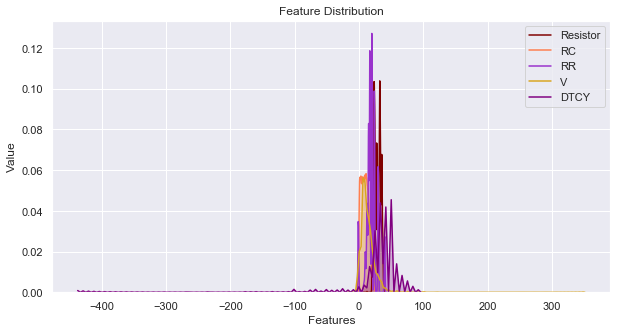

In [25]:
sns.set(rc={'figure.figsize':(10,5)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen"]
index = -1
for i in bioData.columns[2:7]:
    index = index + 1
    fig = sns.kdeplot(bioData[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

In [26]:
bioData.drop(["RR"] , axis = 1 , inplace = True)

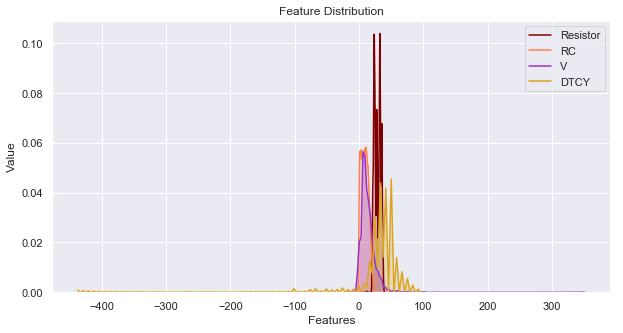

In [27]:
sns.set(rc={'figure.figsize':(10,5)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen"]
index = -1
for i in bioData.columns[2:6]:
    index = index + 1
    fig = sns.kdeplot(bioData[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

In [28]:
bioData.drop(["DTCY"] , axis = 1 , inplace = True)

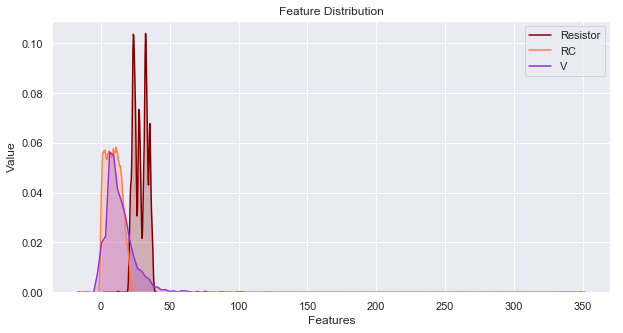

In [29]:
sns.set(rc={'figure.figsize':(10,5)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen"]
index = -1
for i in bioData.columns[2:5]:
    index = index + 1
    fig = sns.kdeplot(bioData[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

In [135]:
# Lets delete Data and Time columns since we dont need it for our work
bioData.drop(["Date", "Time"] , axis = 1 , inplace = True)

In [136]:
bioData.head()

,Resistor,RC,RR,VT,V,DTCY,ACT,SUB
0,35.98228,0,20,0.879047,17.58095,66,Reading,Andrew
1,36.07199,0,20,0.879047,17.58095,66,Reading,Andrew
2,36.11691,0,20,0.879047,17.58095,66,Reading,Andrew
3,36.16188,0,20,0.879047,17.58095,66,Reading,Andrew
4,36.25196,0,20,0.879047,17.58095,66,Reading,Andrew


In [137]:
# Lets change the SUB categorical value into numerics
# Andrew, Betty, Charles, Coll, FD, Isan, Mel, Niuli, Sunwan, Zhao
temp = []
for i in bioData.SUB:
    if i == "Andrew": temp.append(0)
    if i == "Betty": temp.append(1)
    if i == "Charles": temp.append(2)
    if i == "Coll": temp.append(3)
    if i == "FD": temp.append(4)
    if i == "Isan": temp.append(5)
    if i == "Mel": temp.append(6)
    if i == "Niuli": temp.append(7)
    if i == "Sunwan": temp.append(8)
    if i == "Zhao": temp.append(9)
bioData["n_Subject"] = temp

In [138]:
bioData.head()

,Resistor,RC,RR,VT,V,DTCY,ACT,SUB,n_Subject
0,35.98228,0,20,0.879047,17.58095,66,Reading,Andrew,0
1,36.07199,0,20,0.879047,17.58095,66,Reading,Andrew,0
2,36.11691,0,20,0.879047,17.58095,66,Reading,Andrew,0
3,36.16188,0,20,0.879047,17.58095,66,Reading,Andrew,0
4,36.25196,0,20,0.879047,17.58095,66,Reading,Andrew,0


In [139]:
# Now lets drop the SUB column
bioData.drop(["SUB"] , axis = 1 , inplace = True)

In [140]:
bioData.head()

,Resistor,RC,RR,VT,V,DTCY,ACT,n_Subject
0,35.98228,0,20,0.879047,17.58095,66,Reading,0
1,36.07199,0,20,0.879047,17.58095,66,Reading,0
2,36.11691,0,20,0.879047,17.58095,66,Reading,0
3,36.16188,0,20,0.879047,17.58095,66,Reading,0
4,36.25196,0,20,0.879047,17.58095,66,Reading,0


In [141]:
X = bioData.iloc[:, 0:7].values
y = bioData.iloc[:, 7].values

In [143]:
# X
# y

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [144]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
labelencoder_X = LabelEncoder()
X[:, 6] = labelencoder_X.fit_transform(X[:, 6])

onehotencoder = OneHotEncoder(categorical_features = [6])
X = onehotencoder.fit_transform(X).toarray()

In [146]:
X = X[:,:-1]

In [148]:
# Splitting the data into training set and test set
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25, random_state=101)

In [149]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.fit_transform(testX)

In [150]:
print(trainX.shape , trainY.shape)
print(testX.shape , testY.shape)

(154671, 8) (154671,)
(51557, 8) (51557,)


In [151]:
#Taking necessary callbacks of checkpointing and learning rate reducer.
filepath="HAR_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

Using TensorFlow backend.


In [152]:
# Part two - Time for the ANN
# import the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

In [153]:
# Initialize the ANN
model = Sequential()

In [157]:
# Adding the input layer and the first hidden layer
model.add(Dense(64, input_dim=trainX.shape[1] , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [158]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 196)               25284     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                6304      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
__________

In [159]:
history = model.fit(trainX, trainY , epochs=100 , batch_size = 32 , validation_data=(testX, testY) , callbacks=[checkpoint,lr_reduce])

Train on 154671 samples, validate on 51557 samples
Epoch 1/100
154208/154671 [============================>.] - ETA: 0s - loss: 0.7189 - acc: 0.7293
Epoch 00001: val_acc improved from -inf to 0.81079, saving model to HAR_weights.hdf5
154671/154671 [==============================] - 24s 157us/step - loss: 0.7184 - acc: 0.7295 - val_loss: 0.4931 - val_acc: 0.8108
Epoch 2/100
154432/154671 [============================>.] - ETA: 0s - loss: 0.5051 - acc: 0.8111
Epoch 00002: val_acc improved from 0.81079 to 0.83814, saving model to HAR_weights.hdf5
154671/154671 [==============================] - 23s 149us/step - loss: 0.5049 - acc: 0.8111 - val_loss: 0.4480 - val_acc: 0.8381
Epoch 3/100
154496/154671 [============================>.] - ETA: 0s - loss: 0.4413 - acc: 0.8352
Epoch 00003: val_acc improved from 0.83814 to 0.84472, saving model to HAR_weights.hdf5
154671/154671 [==============================] - 23s 149us/step - loss: 0.4411 - acc: 0.8353 - val_loss: 0.3911 - val_acc: 0.8447
Epoc

Epoch 28/100
154304/154671 [============================>.] - ETA: 0s - loss: 0.1224 - acc: 0.9508
Epoch 00028: val_acc did not improve

Epoch 00028: ReduceLROnPlateau reducing learning rate to 5.000000328436726e-07.
154671/154671 [==============================] - 21s 139us/step - loss: 0.1224 - acc: 0.9508 - val_loss: 0.0840 - val_acc: 0.9670
Epoch 29/100
154432/154671 [============================>.] - ETA: 0s - loss: 0.1203 - acc: 0.9523
Epoch 00029: val_acc did not improve

Epoch 00029: ReduceLROnPlateau reducing learning rate to 5.000000555810402e-08.
154671/154671 [==============================] - 21s 136us/step - loss: 0.1204 - acc: 0.9523 - val_loss: 0.0835 - val_acc: 0.9671
Epoch 30/100
154272/154671 [============================>.] - ETA: 0s - loss: 0.1201 - acc: 0.9524
Epoch 00030: val_acc did not improve

Epoch 00030: ReduceLROnPlateau reducing learning rate to 5.000000413701855e-09.
154671/154671 [==============================] - 22s 145us/step - loss: 0.1201 - acc: 0.9

Epoch 52/100
154656/154671 [============================>.] - ETA: 0s - loss: 0.1220 - acc: 0.9512
Epoch 00052: val_acc did not improve

Epoch 00052: ReduceLROnPlateau reducing learning rate to 5.000000617708492e-29.
154671/154671 [==============================] - 26s 166us/step - loss: 0.1221 - acc: 0.9512 - val_loss: 0.0842 - val_acc: 0.9670
Epoch 53/100
154336/154671 [============================>.] - ETA: 0s - loss: 0.1202 - acc: 0.9524
Epoch 00053: val_acc did not improve

Epoch 00053: ReduceLROnPlateau reducing learning rate to 5.0000006177084924e-30.
154671/154671 [==============================] - 30s 193us/step - loss: 0.1201 - acc: 0.9524 - val_loss: 0.0841 - val_acc: 0.9673
Epoch 54/100
154400/154671 [============================>.] - ETA: 0s - loss: 0.1208 - acc: 0.9521
Epoch 00054: val_acc did not improve

Epoch 00054: ReduceLROnPlateau reducing learning rate to 5.0000007681717695e-31.
154671/154671 [==============================] - 29s 185us/step - loss: 0.1209 - acc: 0

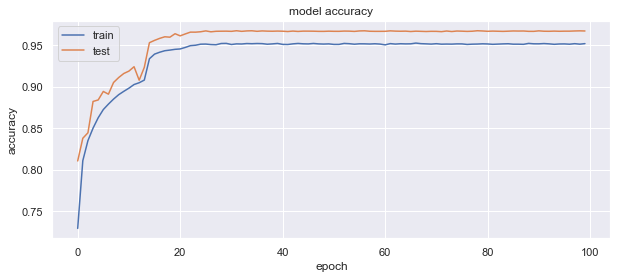

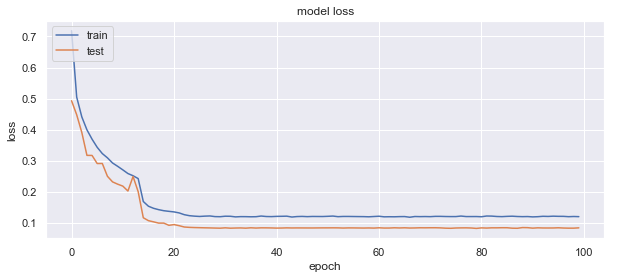

In [160]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [161]:
# Evaluate the network
print("[INFO] evaluating network...")
from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import confusion_matrix
model.load_weights("HAR_weights.hdf5")
y_pred = model.predict(testX)
y_pred = np.argmax(y_pred, axis = 1) 

cm = confusion_matrix(testY, y_pred)
print(cm)


[INFO] evaluating network...
[[3144    0  169    0    0    0  218    0   71    0]
 [   0 3558    0   24    0    3    0   36    0    3]
 [  73    0 9054    0   21    0   16    0   29    2]
 [   0   66    0 4838    0   28    0  123   18   54]
 [   0    0   77    0 3930    0    0    0    0   13]
 [   0    9    0   14    0 3826    0   45    0    9]
 [  71    0    0    0    0    0 4099    4   18    0]
 [   3   42    0   20    0    1    7 6980   19   33]
 [  83    1   41    3    4   56   26   20 7576    0]
 [   0    2    3   17   22    1    0   49    0 2885]]


In [162]:
print(classification_report(testY, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.87      0.90      3602
          1       0.97      0.98      0.97      3624
          2       0.97      0.98      0.98      9195
          3       0.98      0.94      0.96      5127
          4       0.99      0.98      0.98      4020
          5       0.98      0.98      0.98      3903
          6       0.94      0.98      0.96      4192
          7       0.96      0.98      0.97      7105
          8       0.98      0.97      0.97      7810
          9       0.96      0.97      0.97      2979

avg / total       0.97      0.97      0.97     51557



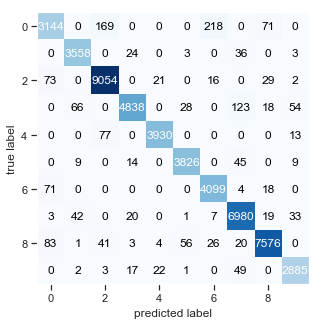

In [166]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(15, 5))
plt.show()

In [171]:
#history = model.fit(trainX, trainY , epochs=10 , batch_size = 32 , validation_data=(testX, testY) , callbacks=[checkpoint,lr_reduce])

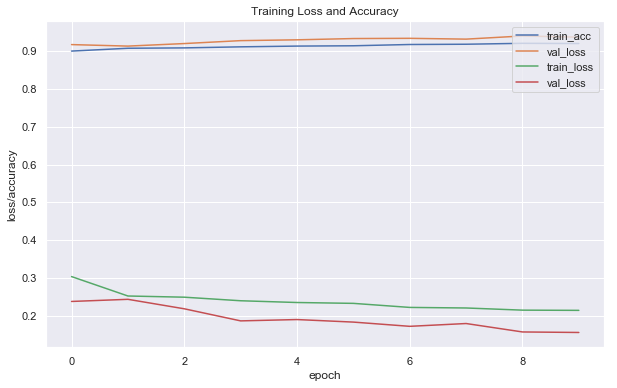

In [172]:
"""
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
plt.plot(history.history['acc'], label="train_acc")
plt.plot(history.history['val_acc'], label="val_loss")
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title('Training Loss and Accuracy')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()
"""